In [1]:
from __future__ import print_function
from PIL import Image
import random
import torch
import torchvision.utils as vutils
from torch.autograd import Variable
import torchvision.transforms

import models

### Load Generator

In [2]:
model_path = 'netG.pth'
netG = models._netG_1(2, 100, 3,64, 1) # ngpu, nz, nc, ngf, n_extra_layers
netG.load_state_dict(torch.load(model_path, map_location=lambda storage, loc: storage))
print(netG)

_netG_1 (
  (main): Sequential (
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True)
    (2): LeakyReLU (0.2, inplace)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True)
    (5): LeakyReLU (0.2, inplace)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True)
    (8): LeakyReLU (0.2, inplace)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
    (11): LeakyReLU (0.2, inplace)
    (extra-layers-0.64.conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (extra-layers-0.64.batchnorm): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
  

In [3]:
def convert_img(img_tensor, nrow):
    img_tensor = img_tensor.cpu()
    grid = vutils.make_grid(img_tensor, nrow=nrow, padding=2)
    ndarr = grid.mul(0.5).add(0.5).mul(255).byte().transpose(0, 2).transpose(0, 1).numpy()
    im = Image.fromarray(ndarr)
    return im

### Display Generated Images

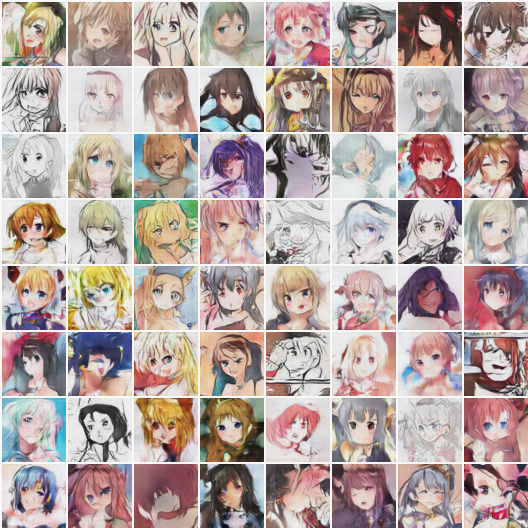

In [4]:
# a batch of images here
noise_batch = torch.FloatTensor(64, 100, 1, 1).normal_(0,1)
noise_batch = Variable(noise_batch)
fake_batch,_ = netG(noise_batch)
im = convert_img(fake_batch.data, 8)
im

### Image Transition

Transition from images generated by random input **z1** to **z2**, basically it is from the same idea of "face arithmetic".

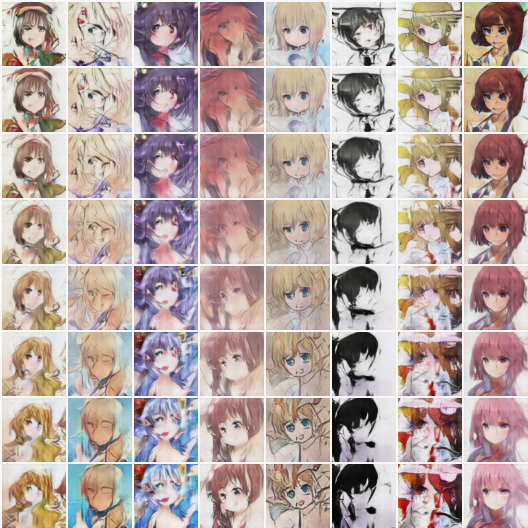

In [7]:
z1 = torch.FloatTensor(8, 100, 1, 1).normal_(0,1)
z2 = torch.FloatTensor(8, 100, 1, 1).normal_(0,1)
dz = (z2 - z1)/7.
z = torch.FloatTensor(64, 100, 1, 1)
for i in range(8):
    z[8*i:8*(i+1),:,:,:] = z1 + i*dz
z = Variable(z)
z_out,_ = netG(z)
z_im = convert_img(z_out.data,8)
z_im